<a href="https://colab.research.google.com/github/sanjay2097/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

The Dataset and its attributes are described below

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-2 = Unused,-1=pay duly,0=Revolving Credit, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


Before moving forward let's understand what actually meant by the Credit Card Default.

A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.
Usually, the default notice is sent by the card issuer after 6 consecutive missed payments.
Performance Metrics
Precision is a good metric to use when the costs of false positive(FP) is high.

**Precision = TP / (TP + FP)**

Recall is a good metric to use when the cost associated with false negative(FN) is high.

**Recall = TP / (TP + FN)**

F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.

**F1-score = 2 (precision recall) / (precision + recall)**

####**In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default. Thus, we will  use Recall as an evaluation metric for our problem**

In [1]:
#Imporing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Adding the data
data = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xlsx')

In [4]:
#Checking first few rows
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


####Some minimum values stood out for not matching the descriptions of their features (Education = 0, Marriage = 0 and PAY_X features = -2). For ‘Education’ and ‘Marriage’, the zero values could have been used to replace missing values. The ‘-2’ on PAY_X didn’t have an explanation, at least without a deep look on the data, but it should mean something positive, similar to ‘-1’ (‘-2’, ‘-1’ and ‘0’ were associated with lower chance of default).

The negative values on BILL_AMTX also seemed odd, but it could simply mean that the customers paid more than their actual debts. A lower probability of default is expected for those customers.

In [6]:
# Summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  float64
 3   EDUCATION                   30000 non-null  float64
 4   MARRIAGE                    30000 non-null  float64
 5   AGE                         30000 non-null  float64
 6   PAY_0                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
#Checking missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

##Feature Engineering

In [8]:
# Renaming the label
data.rename(columns = {'default payment next month':'payment_default'} ,inplace=True )

In [9]:
# Drop ID since its unique for each label
data = data.drop('ID' , axis=1)

In [10]:
# For conviniance  change the columns names  of pay 0,1,2 etc and bill amt 1,2,3 to original meanings
data.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':
                   'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG',
                   'BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL',
                   'PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [11]:
# Since -2 is no consumption we will convert it to 0
data = data.replace(-2,0)

In [12]:
# Adding feature total pay to represent cumulative pay throughout the months
data["total_pay"]=data["PAY_SEPT"]+data["PAY_AUG"]+data["PAY_JUL"]+data["PAY_JUN"]+data["PAY_MAY"]+data["PAY_APR"]

In [13]:
data['EDUCATION'].unique()

array([2., 1., 3., 5., 4., 6., 0.])

The categories 4-others, 5-unknown, and 6-unknown can be grouped into a single class 4

In [14]:
data['EDUCATION'] = data['EDUCATION'].apply(lambda x : 4 if x in[0,5,6] else x)

In [15]:
data['MARRIAGE'].unique()

array([1., 2., 3., 0.])

The column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others but it contains a category '0' which will be joined to the category 3

In [16]:
data['MARRIAGE'] = data['MARRIAGE'].apply(lambda x : 3 if x==0 else x)

In [17]:
# Removing duplicates
print ('Total duplicates removed : {}'.format (data.duplicated().sum()))
df = data.drop_duplicates()

Total duplicates removed : 35


In [18]:
#Summary of updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LIMIT_BAL        29965 non-null  float64
 1   SEX              29965 non-null  float64
 2   EDUCATION        29965 non-null  float64
 3   MARRIAGE         29965 non-null  float64
 4   AGE              29965 non-null  float64
 5   PAY_SEPT         29965 non-null  float64
 6   PAY_AUG          29965 non-null  float64
 7   PAY_JUL          29965 non-null  float64
 8   PAY_JUN          29965 non-null  float64
 9   PAY_MAY          29965 non-null  float64
 10  PAY_APR          29965 non-null  float64
 11  BILL_AMT_SEPT    29965 non-null  float64
 12  BILL_AMT_AUG     29965 non-null  float64
 13  BILL_AMT_JUL     29965 non-null  float64
 14  BILL_AMT_JUN     29965 non-null  float64
 15  BILL_AMT_MAY     29965 non-null  float64
 16  BILL_AMT_APR     29965 non-null  float64
 17  PAY_AMT_SEPT

##Exploratory Data Analysis

####Distibution of categorical features

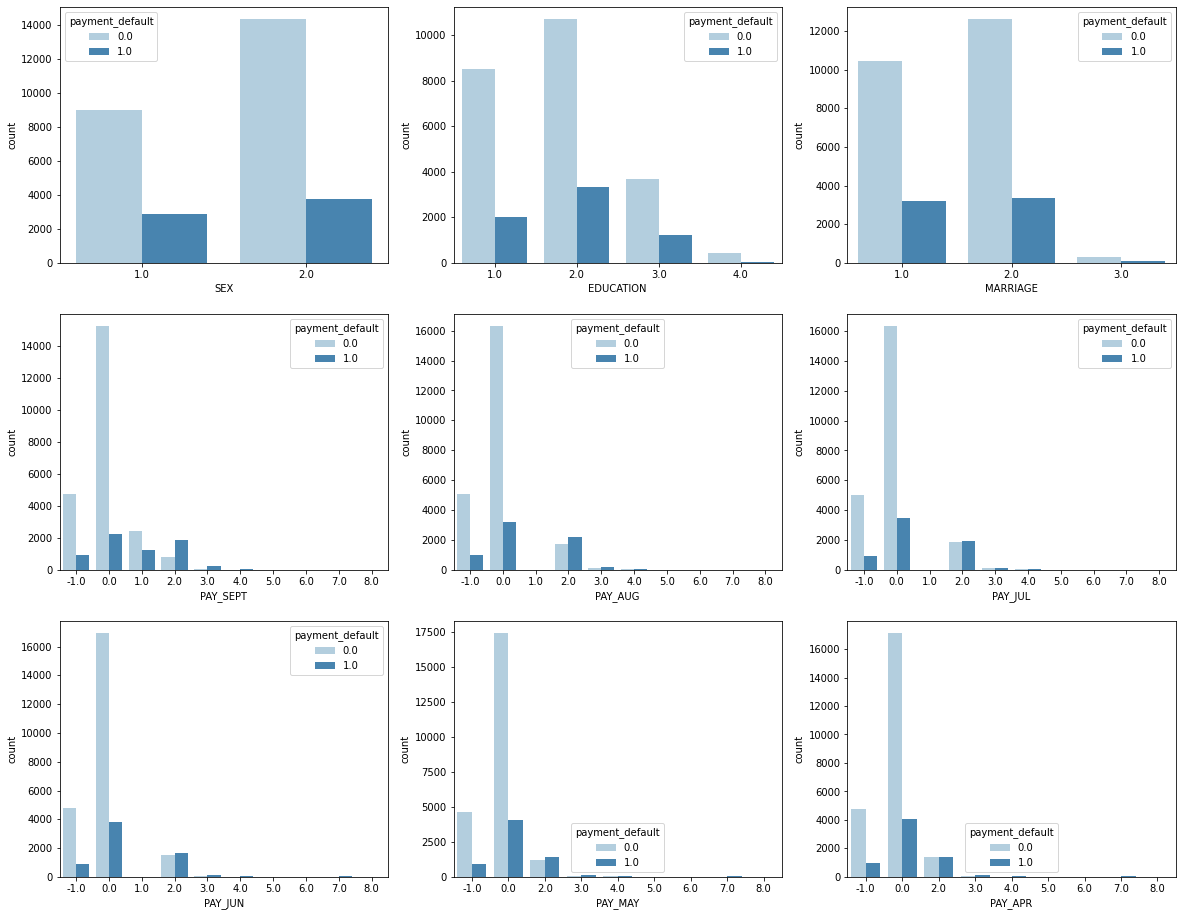

In [19]:
# Plot of discrete features
# List of dicrete features
cat_column = ['SEX','EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
fig = plt.figure(figsize=(20,16))
for i in range(len(cat_column)):
  col=cat_column[i]
  sub=fig.add_subplot(3,3,i+1)
  chart = sns.countplot(data=df,x=col,hue='payment_default',palette='Blues')

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month.

####Distibution of continuous features

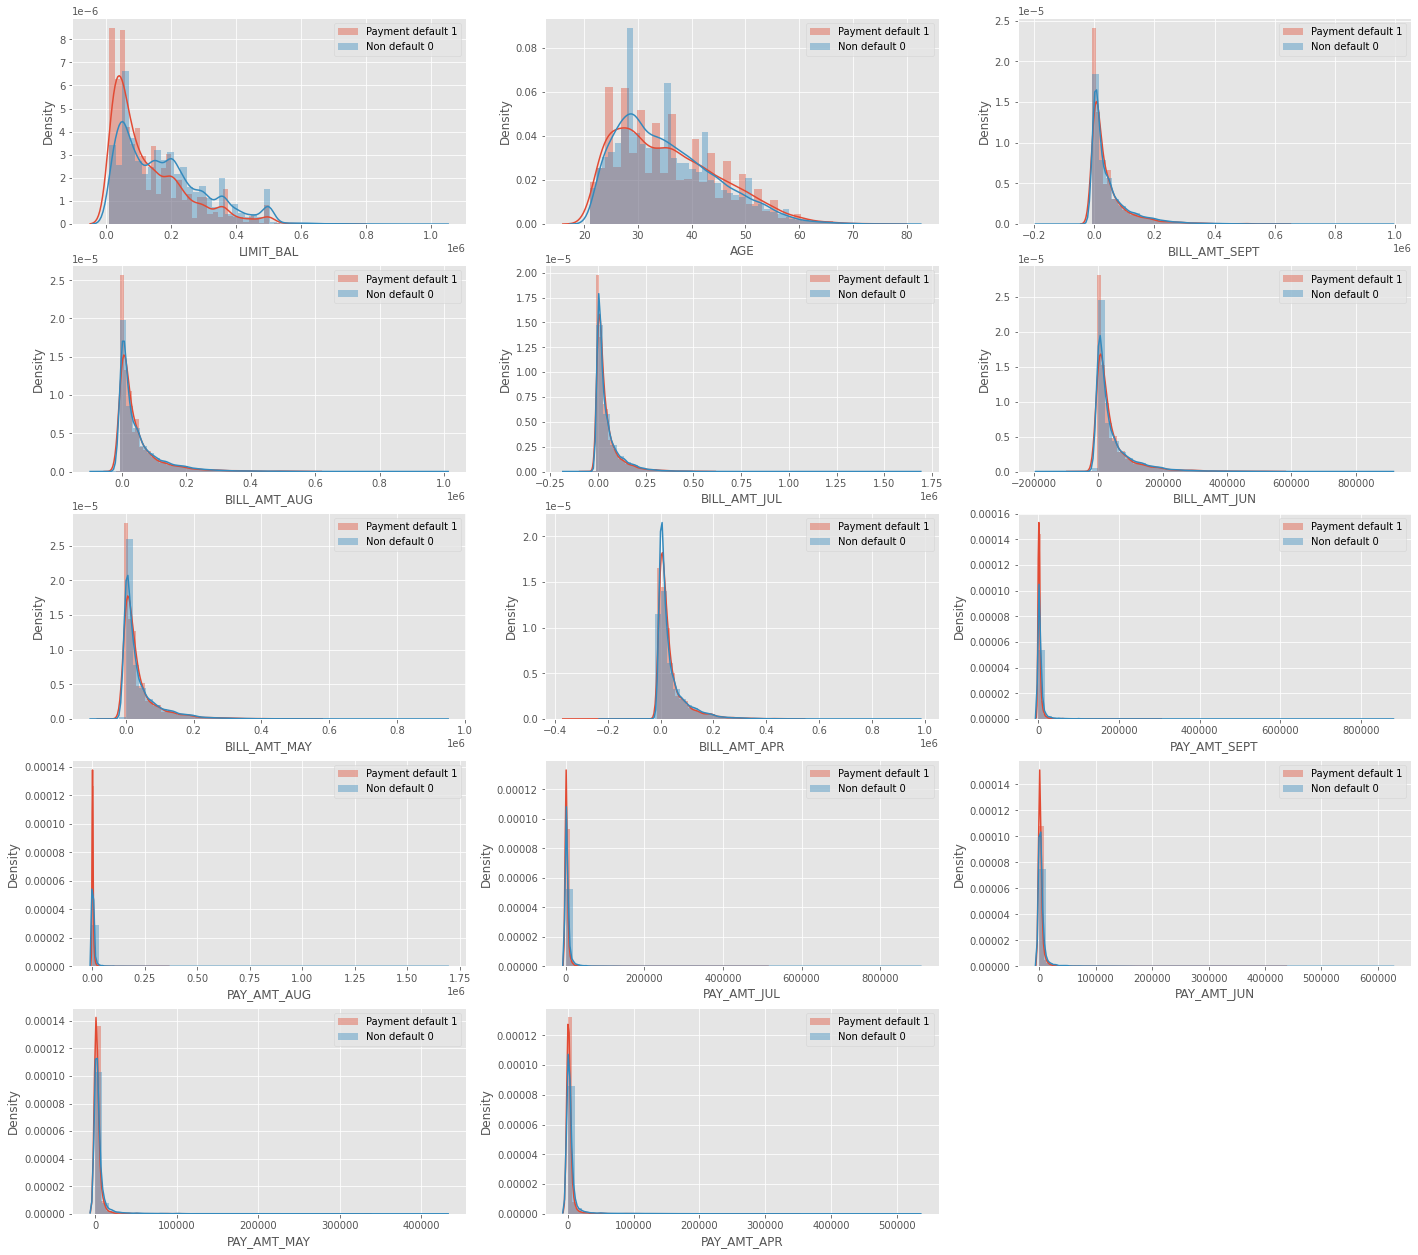

In [20]:
#List of continuous features
con_column = ['LIMIT_BAL','AGE','BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
# Visualizing Graph for distribution of continuous features
plt.style.use('ggplot')
fig = plt.figure(figsize=(24,22))
for i in range(len(con_column)):
  col=con_column[i]
  sub=fig.add_subplot(5,3,i+1)
  ax = sns.distplot(data[data.columns].loc[data['payment_default'] == 1, col],label='Payment default 1')
  ax = sns.distplot(data[data.columns].loc[data['payment_default'] == 0, col],label='Non default 0')
  plt.legend()

Lower balance limit accounts have higher payments defaults than higher balance.
Distribution of monthly payments show higher default rate.

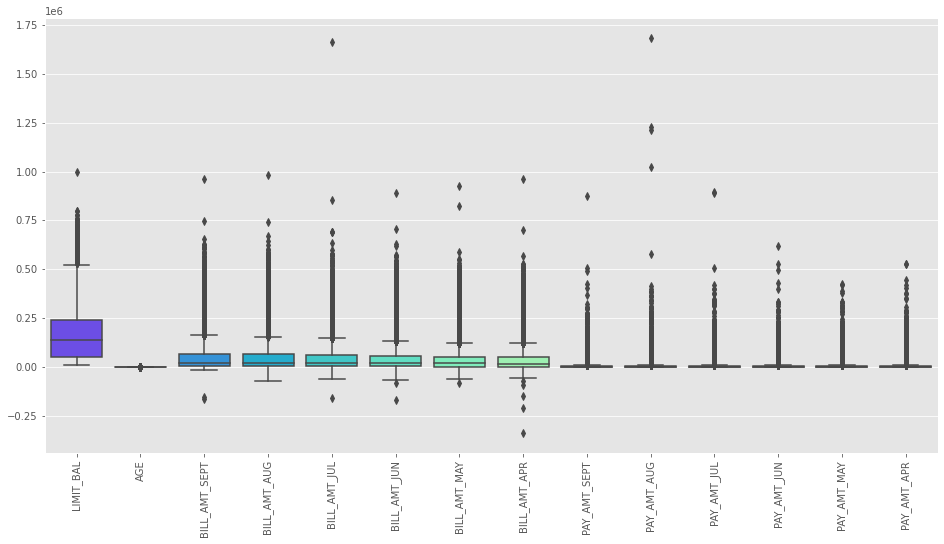

In [21]:
# Boxplot of continuous features
plt.figure(figsize=(16,8))
sns.boxplot(data = df[con_column],palette = "rainbow")
plt.xticks(rotation=90)
plt.show()

####We can see that billing amounts are geenrally much higher than payment amount throughout the months.

### Outlier Treatment

In [22]:
# Removing outlier in default payment label
print (df["payment_default"].value_counts())

# Dropping non defaults where payment is due for more than 5 months
df.drop(df[(df.payment_default == 0) & (df.total_pay > 5)].index,inplace=True)
# Dropping defaults where payment is completed every month
df.drop(df[(df.payment_default == 1) & (df.total_pay < 1) & (data.PAY_SEPT < 1) & (data.PAY_AUG < 1) 
              & (data.PAY_JUL < 1) & (data.PAY_JUN < 1) & (data.PAY_APR < 1) & (data.PAY_MAY < 1)].index,inplace=True)

df["payment_default"].value_counts()

0.0    23335
1.0     6630
Name: payment_default, dtype: int64


0.0    22146
1.0     4297
Name: payment_default, dtype: int64

### Correlation

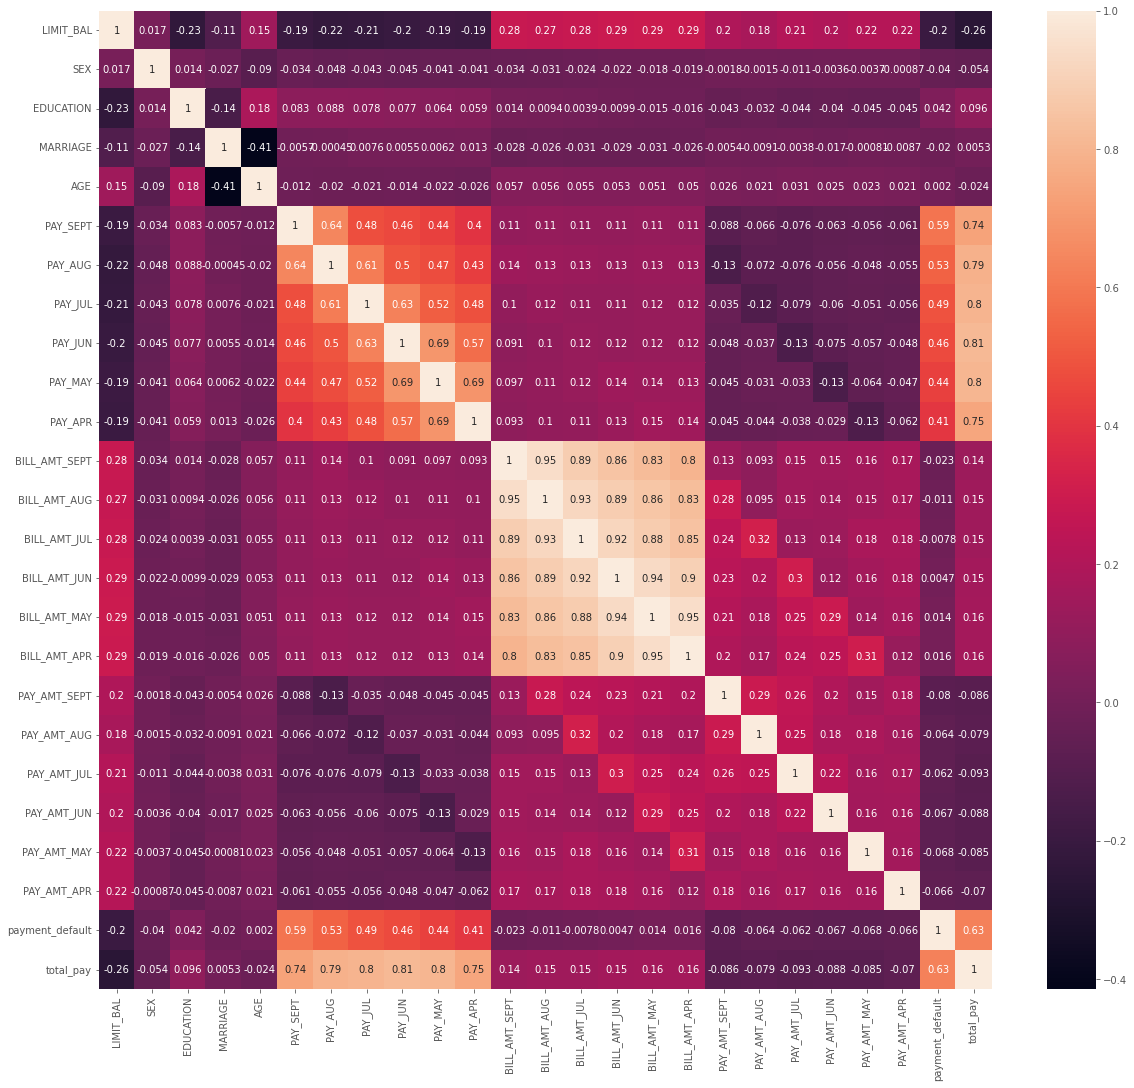

In [23]:
# Pearson correlation heatmap of independent featutes
plt.figure(figsize=(20,18))
ax = sns.heatmap(df.corr(),annot=True)

####A correlation matrix of all variables is shown in the heatmap above. The only feature with a notable positive correlation with the dependent variable ‘payment_default’ is re-payment status during the last month (September). The highest negative correlation with default occurs with Limit_Balance, indicating that customers with lower limit balance are more likely to default. It can also be observed that some variables are highly correlated to each other, that is the case of the amount of bill statement and the repayment status in different months.

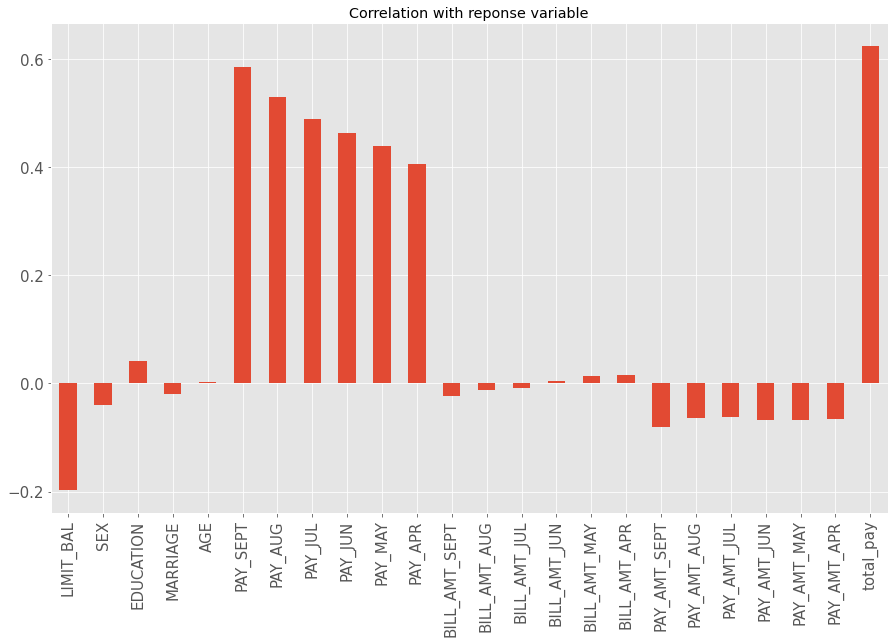

In [24]:
X=df.drop('payment_default',axis=1)
y=df['payment_default']
# Graph of correlation of featutes with target variable payment default
X.corrwith(y).plot.bar(figsize=(15,9),title="Correlation with reponse variable",fontsize=15,
                        rot=90,grid=True)

In [25]:
# Taking only the features which show high correlation with default payments
new_df = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR','PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'payment_default'
       ]]

In [26]:
# Creating dummy variable for categorical data
new_df = pd.get_dummies(new_df,columns=['EDUCATION','SEX'], drop_first=True)

### Splitting Dataset

In [27]:
X = new_df.drop('payment_default',axis=1)
y = new_df['payment_default']

In [28]:
# Creating test and training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(21154, 17)
(5289, 17)


###Managing Class Imbalance

83.74775648117065
16.252245008945465


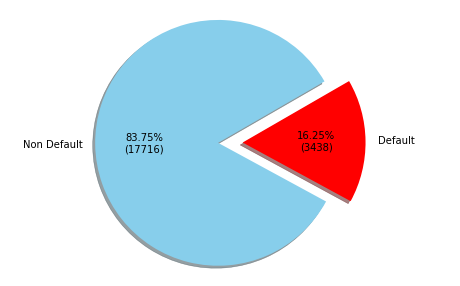

In [29]:
# Plot of majority and minority class
def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
labels = 'Non Default','Default'
total =len(y_train)
my_colors = ['skyblue','red']
my_explode = (0,0.2)
plt.figure(figsize=(8,5))
plt.pie(y_train.value_counts(), labels=labels ,autopct=my_fmt, startangle=30 , shadow =True, colors = my_colors, explode=my_explode )
plt.axis('equal')
plt.show()

In [30]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 21154
Resampled dataset shape 35432


##Applying Models

###Baseline Models

In [31]:
#Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [32]:
# Making function for model evaluation and confusion matrix
def evaluation(y, y_hat,m):
    cm = confusion_matrix(y, y_hat)
    precision = round(precision_score(y, y_hat),3)
    recall = round(recall_score(y, y_hat),3)
    accuracy = round(accuracy_score(y,y_hat),3)
    auc_roc = round(roc_auc_score(y,y_hat),3)
    f1 = round(f1_score(y,y_hat),3)
    print('Model :' , m)
    print('Recall : ', recall)
    print('Accuracy : ', accuracy)
    print('Precision : ', precision)
    print('AUC_ROC : ', auc_roc)
    print('F1: ', f1)
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':12})
    plt.xlabel('predicted', fontsize=10)
    plt.ylabel('actual', fontsize=10)
       
    plt.show();
    print('\n\n')

In [33]:
# Making pipelines for classification models
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42,n_jobs=-1))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42,n_jobs=-1))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state=42,n_jobs=-1))])
pipe_lgbm = Pipeline([('scl', StandardScaler()),
                     ('LGBM', LGBMClassifier(random_state=42,n_jobs=-1))])  

In [34]:
# Storing of models pipeline in list
pipelines = [pipe_lr,pipe_dt,pipe_rf,pipe_knn,pipe_xgb,pipe_lgbm]

In [35]:
# Fitting the model pipelines on training data
for pipe in pipelines:
	pipe.fit(X_smote, y_smote)

Model : Logistic Regression
Recall :  0.787
Accuracy :  0.901
Precision :  0.667
AUC_ROC :  0.855
F1:  0.722


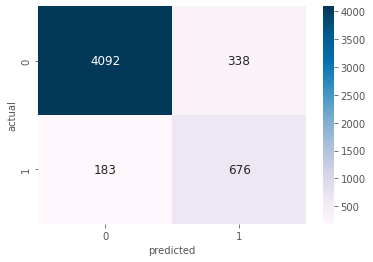




Model : Decision Trees
Recall :  0.728
Accuracy :  0.9
Precision :  0.679
AUC_ROC :  0.83
F1:  0.702


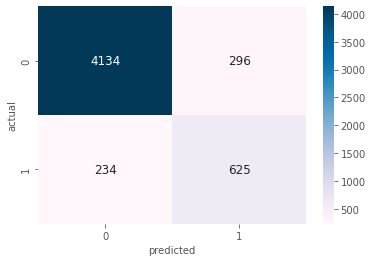




Model : Random Forest
Recall :  0.71
Accuracy :  0.919
Precision :  0.772
AUC_ROC :  0.835
F1:  0.74


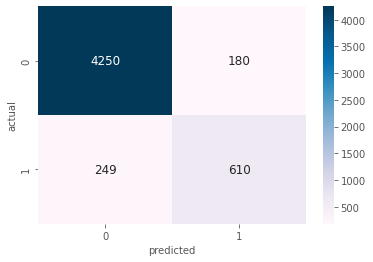




Model : K-Nearest Neighbors
Recall :  0.771
Accuracy :  0.885
Precision :  0.618
AUC_ROC :  0.839
F1:  0.686


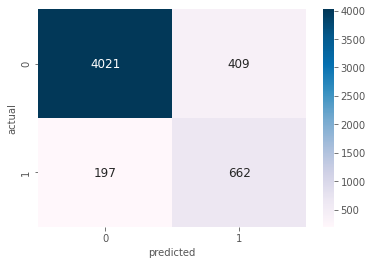




Model : XGB
Recall :  0.774
Accuracy :  0.912
Precision :  0.709
AUC_ROC :  0.856
F1:  0.74


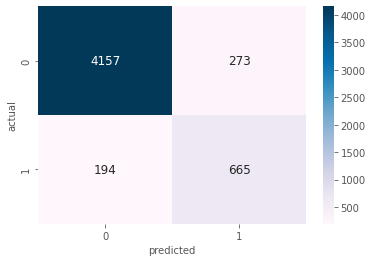




Model : LGBM
Recall :  0.726
Accuracy :  0.915
Precision :  0.743
AUC_ROC :  0.839
F1:  0.735


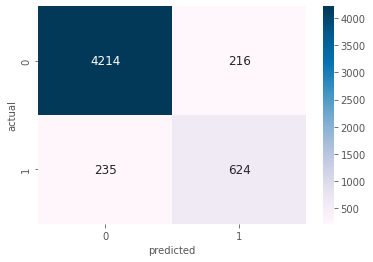

In [36]:
# Evaluating on test data
model_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
              2: 'Random Forest', 3: 'K-Nearest Neighbors', 
              4: 'XGB', 5: 'LGBM'}
for i, model in enumerate(pipelines):
    y_pred = model.predict(X_test)
    evaluation(y_test,y_pred,model_dict.get(i))

###Hyperparameter Tuned Models

In [37]:
# Hyperparameter grid for models
param_range = [2,3,4]
param_range_fl = [10,5,1,0.1,0.01,0.001]
n_estimators = [20,30]

# Logistic Regression
lr_param_grid = [{'LR__penalty': ['l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]

#Decision Tree
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range[:1],
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[:1]}]

#Random Forest
rf_param_grid = [{'RF__min_samples_leaf': param_range[:1],
                  'RF__criterion': ['gini', 'entropy'],
                  'RF__n_estimators': n_estimators,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[:1]}]

#KNN
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['minkowski','euclidean', 'manhattan']}]

#XGBoost
xgb_param_grid = [{'XGB__max_depth': param_range,
                   'XGB__tree_method':['hist'],
                   'XGB__learning_rate': param_range_fl,
                    'XGB__min_child_weight': param_range,
                    'XGB__n_estimators': n_estimators}]
#LightGBM
lgbm_param_grid = [{'LGBM__max_depth': param_range,
                    'LGBM__learning_rate': param_range_fl,
                    'LGBM__num_leaves': param_range[:1],
                    'LGBM__n_estimators': n_estimators}]

In [38]:
#Grid Search CrossValidation
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='f1',
        cv=5)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='f1',
        cv=5)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='f1',
        cv=5)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='f1',
        cv=5)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='f1',
        cv=5)
lgbm_grid_search = GridSearchCV(estimator=pipe_lgbm,
        param_grid=lgbm_param_grid,
        scoring='f1',
        cv=5)

In [39]:
#Fitting the models on training data
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, xgb_grid_search, lgbm_grid_search]
for pipe in grids:
    pipe.fit(X_smote,y_smote)

Model : Logistic Regression
Recall :  0.787
Accuracy :  0.901
Precision :  0.667
AUC_ROC :  0.855
F1:  0.722


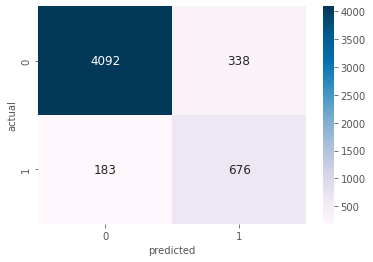




Model : Decision Trees
Recall :  0.766
Accuracy :  0.894
Precision :  0.648
AUC_ROC :  0.843
F1:  0.702


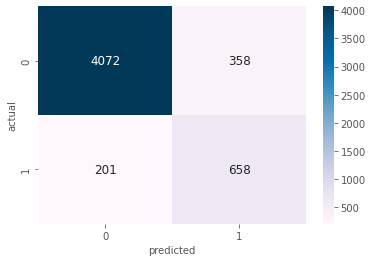




Model : Random Forest
Recall :  0.813
Accuracy :  0.902
Precision :  0.66
AUC_ROC :  0.866
F1:  0.729


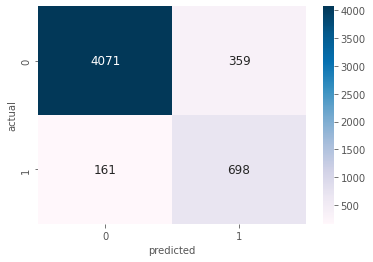




Model : K-Nearest Neighbors
Recall :  0.716
Accuracy :  0.891
Precision :  0.649
AUC_ROC :  0.821
F1:  0.681


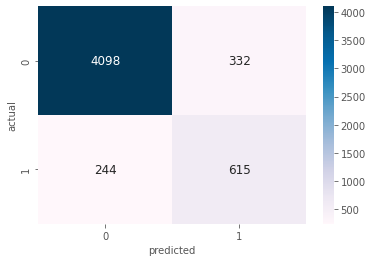




Model : XGB
Recall :  0.803
Accuracy :  0.9
Precision :  0.657
AUC_ROC :  0.861
F1:  0.723


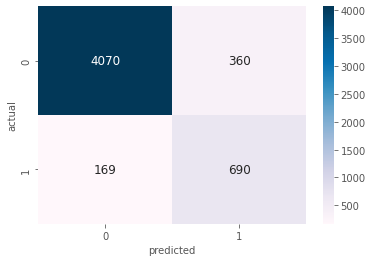




Model : LGBM
Recall :  0.785
Accuracy :  0.909
Precision :  0.693
AUC_ROC :  0.859
F1:  0.736


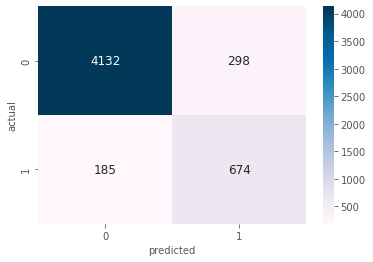

In [40]:
#Evaluating on Test data
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4:'XGB', 5: 'LGBM'}
for i, model in enumerate(grids):
    y_pred = model.predict(X_test)
    evaluation(y_test,y_pred,grid_dict.get(i))

##**Conclusion**

In [41]:
# Summary table
from astropy.table import Table, Column
data_rows = [('Logistic Regression' , 0.79 , 0.90, 0.67 , 0.86 , 0.72 ),
             ('Decision Tree', 0.77 , 0.89 , 0.65 , 0.84 , 0.70 ),
             ('Random Forest', 0.81 , 0.90 , 0.66 ,0.87 , 0.73 ),
             ('K-Nearest Neighbors', 0.72 , 0.89 , 0.64 ,0.82 , 0.68 ),
             ('XGBoost', 0.80 , 0.90 , 0.66 , 0.86 , 0.72 ),
             ('LGBM', 0.79 , 0.91 , 0.69 , 0.86 , 0.74 ),
            ]
t = Table(rows=data_rows, names=('Model', 'Recall', 'Accuracy', 'Precision', 'AUC','F1'))
print(t)

       Model        Recall Accuracy Precision AUC   F1 
------------------- ------ -------- --------- ---- ----
Logistic Regression   0.79      0.9      0.67 0.86 0.72
      Decision Tree   0.77     0.89      0.65 0.84  0.7
      Random Forest   0.81      0.9      0.66 0.87 0.73
K-Nearest Neighbors   0.72     0.89      0.64 0.82 0.68
            XGBoost    0.8      0.9      0.66 0.86 0.72
               LGBM   0.79     0.91      0.69 0.86 0.74


###RandomForest and XGBoost are the best model for us since they have highest recall scores.But overall all the models are performing really well.